# Atividade V - Visualização de Dados

Objetivo: Análise Exploratória e visualizações com matplotlib para o dataset Titanic

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_titanic(path='titanic.csv'):
    if os.path.exists(path):
        df = pd.read_csv(path)
        print(f"Carregado {path} com shape: {df.shape}")
        return df
    else:
        raise FileNotFoundError(f"Arquivo '{path}' não encontrado no diretório do notebook. Coloque titanic.csv aqui.")



In [5]:
df = load_titanic('titanic.csv')
df.head()

Carregado titanic.csv com shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,08.05,NaN,S


In [6]:
def resumo_estrutura(df):
    resumo = pd.DataFrame({
        'dtype': df.dtypes,
        'n_unique': df.nunique(),
        'n_null': df.isnull().sum(),
        'pct_null': df.isnull().mean()
    })
    return resumo

resumo = resumo_estrutura(df)
resumo

,dtype,n_unique,n_null,pct_null
PassengerId,int64,891,0,0.000000
Survived,int64,2,0,0.000000
Pclass,int64,3,0,0.000000
Name,object,891,0,0.000000
Sex,object,2,0,0.000000
Age,float64,88,177,0.198653
SibSp,int64,7,0,0.000000
Parch,int64,7,0,0.000000
Ticket,object,681,0,0.000000
Fare,object,248,0,0.000000


In [7]:
os.makedirs('figures', exist_ok=True)
print("Pasta ./figures pronta.")

Pasta ./figures pronta.


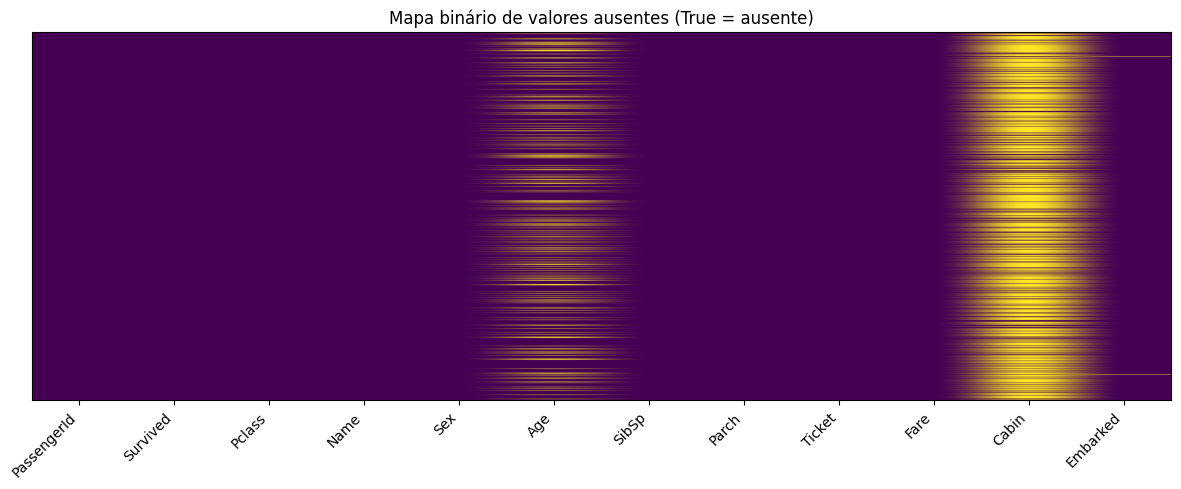

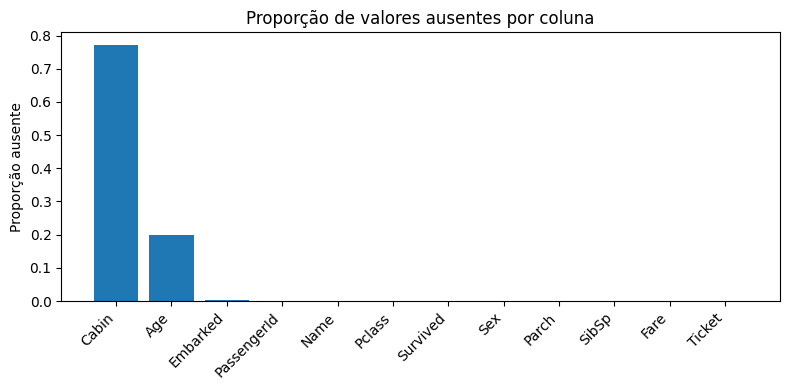

In [8]:
plt.figure(figsize=(12,5))
plt.imshow(df.isnull(), aspect='auto')
plt.yticks([])
plt.xticks(range(len(df.columns)), df.columns, rotation=45, ha='right')
plt.title('Mapa binário de valores ausentes (True = ausente)')
plt.tight_layout()
plt.show()

pct = df.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
plt.bar(pct.index, pct.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proporção ausente')
plt.title('Proporção de valores ausentes por coluna')
plt.tight_layout()
plt.show()

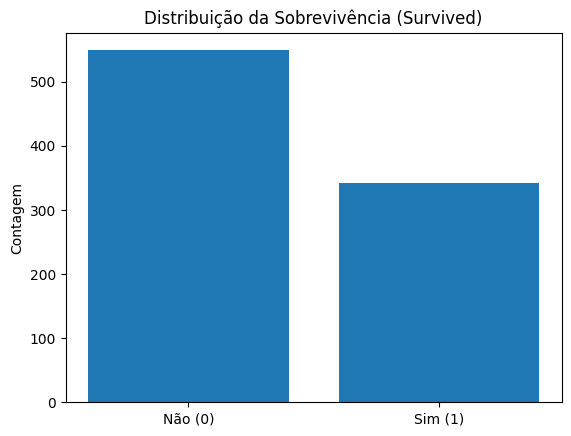

Survived
0    549
1    342
Name: count, dtype: int64


In [9]:
counts = df['Survived'].value_counts().sort_index()
plt.figure()
plt.bar(['Não (0)','Sim (1)'], counts.values)
plt.title('Distribuição da Sobrevivência (Survived)')
plt.ylabel('Contagem')
plt.show()
print(counts)

Survived    0    1
Sex               
female     81  233
male      468  109


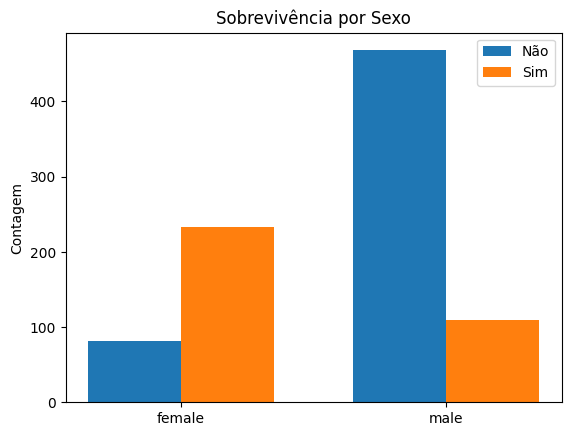

In [10]:
tab = pd.crosstab(df['Sex'], df['Survived'])
print(tab)
ind = np.arange(len(tab))
width = 0.35
plt.figure()
plt.bar(ind - width/2, tab[0], width)
plt.bar(ind + width/2, tab[1], width)
plt.xticks(ind, tab.index)
plt.legend(['Não','Sim'])
plt.title('Sobrevivência por Sexo')
plt.ylabel('Contagem')
plt.show()

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


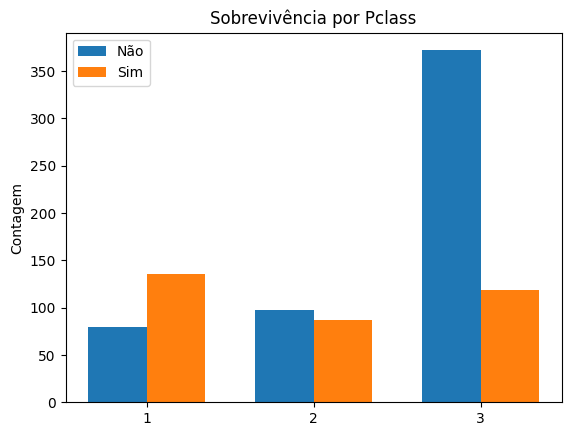


Taxa média de sobrevivência por Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [11]:
tab = pd.crosstab(df['Pclass'], df['Survived']).sort_index()
print(tab)
plt.figure()
ind = np.arange(len(tab))
width = 0.35
plt.bar(ind - width/2, tab[0], width)
plt.bar(ind + width/2, tab[1], width)
plt.xticks(ind, tab.index)
plt.legend(['Não','Sim'])
plt.title('Sobrevivência por Pclass')
plt.ylabel('Contagem')
plt.show()

print("\nTaxa média de sobrevivência por Pclass:")
print(df.groupby('Pclass')['Survived'].mean())


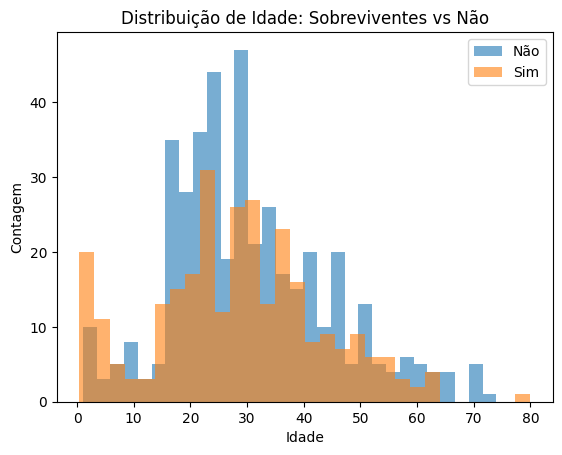

C:\Users\djeff\AppData\Local\Temp\ipykernel_14716\561510101.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Não','Sim'])


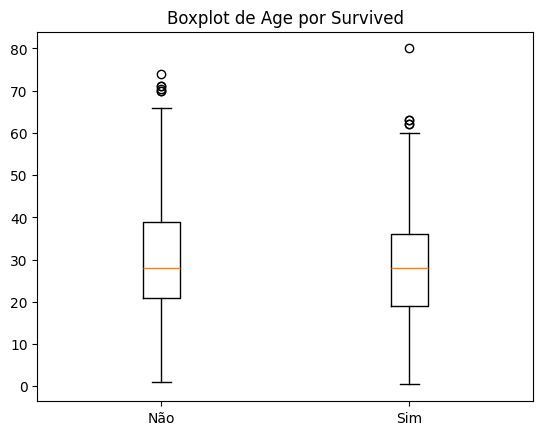

Survived         0         1
age_bin                     
0-12      0.420290  0.579710
13-18     0.571429  0.428571
19-35     0.617318  0.382682
36-60     0.600000  0.400000
60+       0.772727  0.227273


In [12]:
ages_survived = df[df['Survived']==1]['Age'].dropna()
ages_not = df[df['Survived']==0]['Age'].dropna()

plt.figure()
plt.hist(ages_not, bins=30, alpha=0.6)
plt.hist(ages_survived, bins=30, alpha=0.6)
plt.title('Distribuição de Idade: Sobreviventes vs Não')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend(['Não','Sim'])
plt.show()

plt.figure()
data = [ages_not, ages_survived]
plt.boxplot(data, labels=['Não','Sim'])
plt.title('Boxplot de Age por Survived')
plt.show()

# Faixas etárias sugeridas (opcional)
df['age_bin'] = pd.cut(df['Age'], bins=[0,12,18,35,60,120], labels=['0-12','13-18','19-35','36-60','60+'])
print(pd.crosstab(df['age_bin'], df['Survived'], normalize='index'))


Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


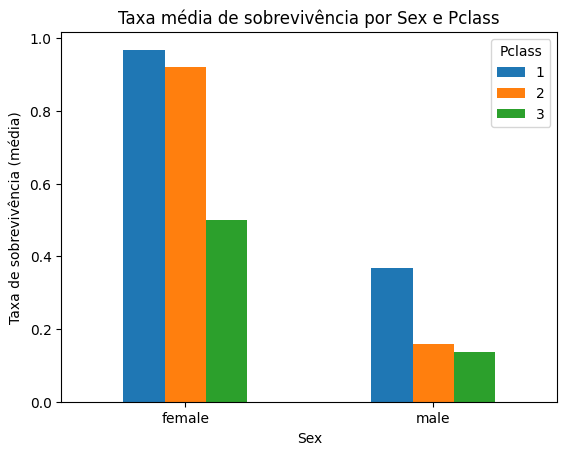

In [13]:
group = df.groupby(['Sex','Pclass'])['Survived'].mean().unstack()
print(group)
group.plot(kind='bar')
plt.title('Taxa média de sobrevivência por Sex e Pclass')
plt.ylabel('Taxa de sobrevivência (média)')
plt.xticks(rotation=0)
plt.show()


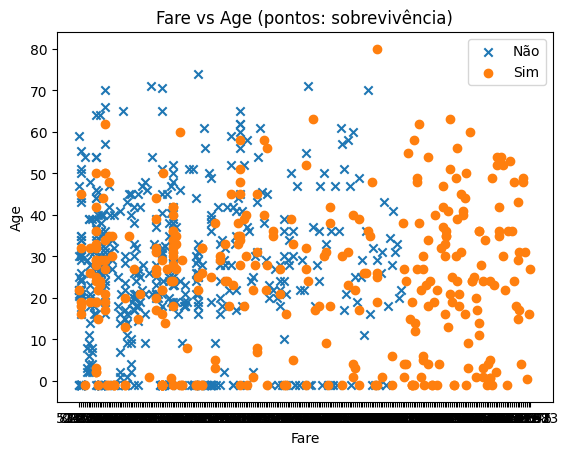

In [15]:
survived = df[df['Survived']==1]
notsurv = df[df['Survived']==0]

plt.figure()
plt.scatter(notsurv['Fare'].fillna(0), notsurv['Age'].fillna(-1), marker='x')
plt.scatter(survived['Fare'].fillna(0), survived['Age'].fillna(-1), marker='o')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Fare vs Age (pontos: sobrevivência)')
plt.legend(['Não','Sim'])
plt.show()


